# How to Beat Bobby Flay
### Memphis Lau

*Beat Bobby Flay* is a TV cooking show hosted and starring the famous chef Bobby Flay. In this show, there are two rounds. The first round starts with two competitors, who face off in a timed battle to cook any dish using a special chosen ingredient. Guests, usually friends of Bobby Flay or celebrities, choose whose dish is better. 

The winner moves on to the final round, now against Bobby Flay. The contestant can pick any dish he/she wants, and Bobby must make the same dish. After time runs out, 3 professional chefs come out and judge the dishes without knowing who made which dish. The dish with the most votes wins.

## Reading in and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
data = pd.read_csv("beatbobbyflay.csv")

In [2]:
data.head()

,num_overall,num_within_season,title,airdate,ingredients,dish,cuisine_type,winner,season,guest1,guest2,guest3,contestant1,contestant2,judge1,judge2,judge3
0,1,1,"""Grueneberg and Nunziata""","August 24, 2013",zucchini,chicken parm,Italian,Sarah Grueneberg,1,Alex Guarnaschelli,Jeff Mauro,NaN,Alberico Nunziata,Sarah Grueneberg,Billy Grant,Marissa May,Lauren DeMaio
1,2,2,"""Welcome to New York!""","March 3, 2014",skirt steak,shrimp and grits,American,Bobby Flay,1,Sunny Anderson,Jonathan Waxman,NaN,Jennifer Nguyen,Anthony Lamas,Cobi Levy,Kelsey Nixon,Roberto Treviño
2,3,3,"""Farmer and the Belle""","March 6, 2014",red prawn,chicken and waffles,American,Bobby Flay,1,Michael Symon,Simon Majumdar,NaN,Matthew Raiford,Karen Akunowicz,Corby Kummer,Melba Wilson,Harold Dieterle
3,4,4,"""Old Dog, New Tricks""","March 13, 2014",cauliflower,meat tacos,Mexican,Brian Tsao,1,Alex Guarnaschelli,Anne Burrell,NaN,Adam Harvey,Brian Tsao,Michael Chernow,Daniel Holzman,Wylie Dufresne
4,5,5,"""Fighting Irish""","March 20, 2014",scallops,bangers & mash,British,Bobby Flay,1,Giada De Laurentiis,Mo Rocca,NaN,Steven McHugh,Brian Young,Ed Levine,Madison Cowan,Nils Norén


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   num_overall        306 non-null    int64 
 1   num_within_season  306 non-null    int64 
 2   title              306 non-null    object
 3   airdate            306 non-null    object
 4   ingredients        306 non-null    object
 5   dish               306 non-null    object
 6   cuisine_type       306 non-null    object
 7   winner             306 non-null    object
 8   season             306 non-null    int64 
 9   guest1             306 non-null    object
 10  guest2             299 non-null    object
 11  guest3             4 non-null      object
 12  contestant1        306 non-null    object
 13  contestant2        306 non-null    object
 14  judge1             306 non-null    object
 15  judge2             306 non-null    object
 16  judge3             306 non-null    object
dt

As we can see, all of the columns are filled with non-missing values, except for 6 episodes that only had 1 guest and 302 episodes that did not have a 3rd guest. This does not matter for the sake of our project, since the guests do not play a significant role in whether or not Bobby Flay wins, and thus will not be analyzed.

Because our main target is finding patterns and trends in how to beat Bobby Flay, we will create a column that solely represents whether or not Bobby Flay won that episode.

In [4]:
data['Win'] = list(data.winner == 'Bobby Flay')

In [5]:
sum(data.Win)

192

We see that Bobby Flay has won in 192 of the 306 episodes in this dataset, a 62.7% clip. In the rest of this section, we will analyze trends and patterns that show significant change in win rate for Bobby Flay.

## Season Trends

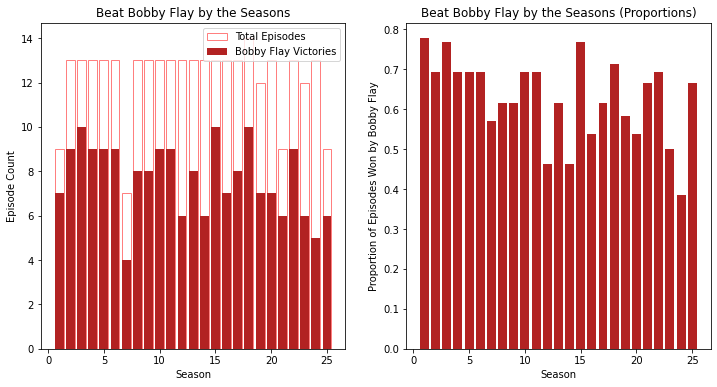

In [6]:
seasons = data.groupby('season').title.count()
seasons_flay = data.groupby('season').Win.sum()
seasons_win_prop = seasons_flay / seasons

plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
plt.bar(seasons.index, seasons, color = 'white', edgecolor = 'red', alpha = 0.5, label = 'Total Episodes')
plt.bar(seasons.index, seasons_flay, color = 'firebrick',  label = 'Bobby Flay Victories')
plt.xlabel('Season')
plt.ylabel('Episode Count')
plt.title('Beat Bobby Flay by the Seasons')
plt.legend()

plt.subplot(1,2,2)
plt.bar(seasons.index, seasons_win_prop, color = 'firebrick')
plt.xlabel('Season')
plt.ylabel('Proportion of Episodes Won by Bobby Flay')
plt.title('Beat Bobby Flay by the Seasons (Proportions)')
plt.show()

There appears to be no significant trend throughout seasons. There definitely are some seasons with high win percentages for Bobby Flay (and some with low win percentage), but they appear randomly.

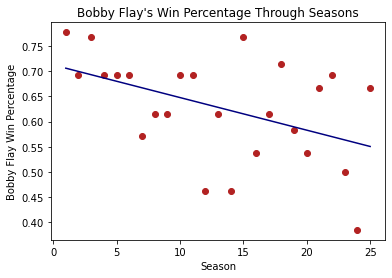

In [7]:
plt.plot(seasons_win_prop.index, seasons_win_prop, 'o', color = 'firebrick')
m, b = np.polyfit(seasons_win_prop.index, seasons_win_prop, 1)
plt.plot(seasons_win_prop.index, m*seasons_win_prop.index+b, color = 'navy')
plt.xlabel('Season')
plt.ylabel('Bobby Flay Win Percentage')
plt.title("Bobby Flay's Win Percentage Through Seasons")
plt.show()

A linear regression line tells us that Bobby Flay's win percentage goes down as the seasons go on, but it is not a strong relation.

In [8]:
pd.DataFrame(seasons_win_prop.sort_values()[0:5]).rename(columns = {0: 'Bobby Flay Win Percentage'})

,Bobby Flay Win Percentage
season,
24,0.384615
14,0.461538
12,0.461538
23,0.500000
20,0.538462


In [9]:
pd.DataFrame(seasons_win_prop.sort_values(ascending = False)[0:5]).rename(columns = {0: 'Bobby Flay Win Percentage'})

,Bobby Flay Win Percentage
season,
1,0.777778
3,0.769231
15,0.769231
18,0.714286
2,0.692308


When looking at the 5 lowest win proportions and the 5 highest, it seems that it may have been harder to Beat Bobby Flay in earlier seasons, as shown by the first three seasons having 3 of the 5 highest win percentages in show history. 

### Episode Trends

In [10]:
episodes = data.groupby('num_within_season').title.count()
episodes_flay = data.groupby('num_within_season').Win.sum()
episodes_win = pd.DataFrame(episodes_flay / episodes)
episodes_win.columns = ['Win Percentage']

In [11]:
episodes_win

,Win Percentage
num_within_season,
1,0.480000
2,0.560000
3,0.680000
4,0.625000
5,0.576923
6,0.560000
7,0.840000
8,0.625000
9,0.625000


These are the win percentages for Bobby Flay across each episode. However, not every season has the same amount of episodes, so we will need to do deeper analysis. The biggest takeaway from this initial chart is that Bobby Flay only wins 48% of the time on the season opener, a significant drop from the ~63% of episodes he usually wins.

In [12]:
last_episode = data.groupby('season').num_within_season.max()
last_episode_win = 0
for i in range(1,26):
    last = data[(data.season == i) & (data.num_within_season == last_episode[i])]
    last_episode_win += last.iloc[0]['Win']

In [13]:
last_episode_win / 25

0.88

This is a much more eye-opening fact. Bobby Flay wins on 88% of his season finales, meaning that for a higher chance to beat Bobby Flay, competing in the season finale is not a good idea.

Here is a summarizing chart of this section:

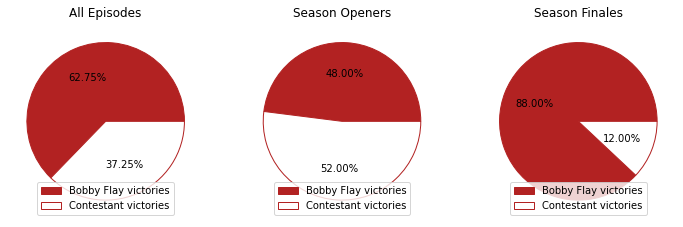

In [14]:
overall_win = sum(data.Win) / len(data)
season_opener = episodes_win.loc[1][0]
season_finale = last_episode_win / 25

fig, ax = plt.subplots(1, 3, figsize = (12,4))

#plt.subplot(121)
ax[0].pie([overall_win, 1-overall_win], colors = ['firebrick', 'white'], 
        labels = ['Bobby Flay victories', 'Contestant victories'], autopct = '%1.2f%%', 
        labeldistance = None, wedgeprops = {'linewidth': 1, 'edgecolor' : 'firebrick'})
ax[0].set_title('All Episodes')
ax[0].legend(loc = 'lower center')

#plt.subplot(122)
ax[1].pie([season_opener, 1-season_opener], colors = ['firebrick', 'white'], 
        labels = ['Bobby Flay victories', 'Contestant victories'], autopct = '%1.2f%%', 
        labeldistance = None, wedgeprops = {'linewidth': 1, 'edgecolor' : 'firebrick'})
ax[1].set_title('Season Openers')
ax[1].legend(loc = 'lower center')

#plt.subplot(123)
ax[2].pie([season_finale, 1-season_finale], colors = ['firebrick', 'white'], 
        labels = ['Bobby Flay victories', 'Contestant victories'], autopct = '%1.2f%%', 
        labeldistance = None, wedgeprops = {'linewidth': 1, 'edgecolor' : 'firebrick'})
ax[2].set_title('Season Finales')
ax[2].legend(loc = 'lower center')

plt.show()

## Dishes Chosen

We start looking for trends in the second round. 

In the first round, two contestants battle, using an ingredient of the show's choice. This ingredient does not directly affect whether or not Bobby Flay wins, and each episode features a different ingredient. Thus, we will not look into the starting ingredient. Rather, the dish chosen is more important.

In [15]:
data.dish.nunique()

303

### Repeated Dishes

There are 303 unique dishes chosen out of the 306 episodes in our dataset. Though it is an incredibly small sample size, we will still explore the 3 repeated dishes.

In [16]:
pd.DataFrame(data.groupby('dish').dish.count().sort_values(ascending = False)[0:3])

,dish
dish,
Shrimp and Grits,2
burger,2
Chicken Cordon Bleu,2


In [17]:
data[data.dish.isin(['Shrimp and Grits', 'burger', 'Chicken Cordon Bleu'])][['num_overall', 'dish', 'winner']]

,num_overall,dish,winner
5,6,burger,Bobby Flay
52,53,burger,Bobby Flay
147,148,Shrimp and Grits,Bobby Flay
159,160,Chicken Cordon Bleu,Lionel Haeberle
260,261,Shrimp and Grits,Bobby Flay
303,304,Chicken Cordon Bleu,Bobby Flay


There appears to be no significant trend regarding repeated dishes. Bobby Flay won both battles with burgers, split the matches of Chicken Cordon Bleu, and again won both of shrimp and grits.

### Cuisines of the Dishes

Perhaps, more interesting is the cuisines of the chosen dishes. Here is the distribution of cuisines in this show (also seen in Cuisines part of this article).

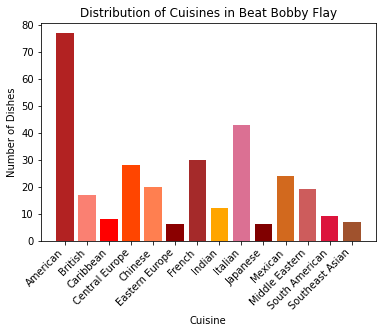

In [53]:
cuisine_count = data.groupby('cuisine_type').num_within_season.count()
colors = ['firebrick', 'salmon', 'red', 'orangered', 'coral', 'darkred', 'brown', 
          'orange', 'palevioletred', 'maroon', 'chocolate', 'indianred', 'crimson', 'sienna']
plt.bar(cuisine_count.index, cuisine_count, color = colors)
plt.xlabel('Cuisine')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of Dishes')
plt.title('Distribution of Cuisines in Beat Bobby Flay')
plt.show()

American dishes are definitely the most common, but there is a solid amount of representation amongst other cuisines and cultures. Let's see how Bobby Flay fares cooking different cuisines.

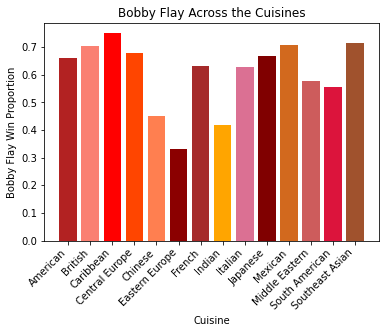

In [54]:
cuisine_win = data.groupby('cuisine_type').Win.sum()
cuisine_prop = cuisine_win / cuisine_count
plt.bar(cuisine_count.index, cuisine_prop, color = colors)
plt.xlabel('Cuisine')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Bobby Flay Win Proportion')
plt.title('Bobby Flay Across the Cuisines')
plt.show()

Right away, we see that the three cuisines that Bobby Flay struggles the most against are Chinese, Eastern European, and Indian. On closer examining, his 33% win rate against Eastern European dishes is not significant, since he won 2 out of only 6 matchups. In addition, his low win rate with Indian dishes could also be argued as insignificant (5 wins out of 12 episodes). However, Chinese dishes have a large enough sample size, with 11 out of 20 contestants winning with their Chinese dish. 

It is good to see that with American dishes (which make up a large percentage of all dishes), Bobby Flay's win percentage remains similar to his overall win percentage across all episodes.

It is also a positive sign that there is no cuisine that Bobby Flay entirely dominates. There are no cuisines in which he wins above 75% of the time, meaning that a contestant will always have a chance despite which cuisine they pick.

### Dessert vs. Non-Dessert

Another interesting factor we can look at is whether or not a dish was a dessert.

In [20]:
data['dessert'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
              0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
              0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
              0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
              0, 0, 0, 0, 0, 0]

In [21]:
dessert = data[data.dessert == 1]
dessert.dish[0:4]

18          French toast
69    Dutch baby pancake
77          chicken mole
84           cream puffs
Name: dish, dtype: object

In [22]:
len(dessert)

20

There are only 20 dessert dishes out of the 306 episodes. This is probably because desserts are difficult to make in a timed setting. Therefore, any results from this analysis will most likely not be statistically signficant, but we can still explore.

In [23]:
dessert.Win.sum() / len(dessert)

0.55

Bobby Flay only wins 55% of dessert rounds, as opposed to the usual 63% he wins across all episodes.

## Judges

In [24]:
judges = data[['judge1', 'judge2', 'judge3']]
unique_judges1 = judges['judge1'].unique()
unique_judges2 = judges['judge2'].unique()
unique_judges3 = judges['judge3'].unique()
total_judges = np.concatenate((unique_judges1, unique_judges2, unique_judges3))
unique_judges = np.unique(total_judges)

In [25]:
len(unique_judges)

336

Throughout our 306 episodes, there are 336 unique people who have acted as judges. Now, we will compute how many episodes each person has appeared on as a judge.

In [26]:
d = {}
for i in unique_judges:
    d[i] = 0
    for row in range(len(judges)):
        for column in range(3):
            if judges.iloc[row, column] == i:
                d[i] += 1

In [27]:
judges_dist = pd.DataFrame(d.items(), columns = ['Judge', 'Number of Appearances'])

In [28]:
judges_dist.sort_values('Number of Appearances', ascending = False)[0:5]

,Judge,Number of Appearances
237,Michael Psilakis,19
113,Frank Prisinzano,17
202,Leah Cohen,16
137,Ivy Stark,15
212,Madison Cowan,15


Here are the judges that have appeared the most amount of times. We see that the amount of appearances is not that high, as the show tries to limit repeitiveness. Now, I will add a column of how many wins Bobby Flay has when each person is the judge.

In [29]:
judges_dist['Bobby Flay victories'] = np.zeros((336,1))
for row1 in range(len(judges_dist)):
    for row2 in range(len(data)):
        if data.loc[row2, 'judge1'] == judges_dist.loc[row1, 'Judge'] or data.loc[row2, 'judge2'] == judges_dist.loc[row1, 'Judge'] or data.loc[row2, 'judge3'] == judges_dist.loc[row1, 'Judge']:
            judges_dist.loc[row1, 'Bobby Flay victories'] += data.loc[row2, 'Win']

In [30]:
judges_dist['Bobby Flay Win PCT'] = judges_dist['Bobby Flay victories'] / judges_dist['Number of Appearances']

In [31]:
judges_dist.head()

,Judge,Number of Appearances,Bobby Flay victories,Bobby Flay Win PCT
0,Abigail Hitchcock,3,2.0,0.666667
1,Adam Greenberg,1,1.0,1.000000
2,Adam Sappington,1,1.0,1.000000
3,Adrienne Cheatham,4,2.0,0.500000
4,Akhtar Nawab,4,2.0,0.500000


Now, we have a table with every unique judge that has ever judged an episode, the amount of appearances each has had, the amount of times Bobby Flay won when he/she was the judge, and Bobby Flay's win percentage in these episodes. We first explore the distribution of this new dataset.

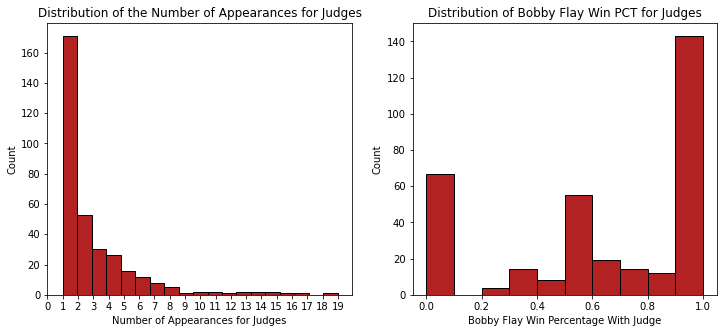

In [32]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.hist(judges_dist['Number of Appearances'], bins = 19, color = 'firebrick', edgecolor = 'black', linewidth = 1)
plt.xlabel('Number of Appearances for Judges')
plt.ylabel('Count')
plt.title('Distribution of the Number of Appearances for Judges')
plt.xticks(np.arange(20))

plt.subplot(1,2,2)
plt.hist(judges_dist['Bobby Flay Win PCT'], color = 'firebrick', edgecolor = 'black')
plt.xlabel('Bobby Flay Win Percentage With Judge')
plt.ylabel('Count')
plt.title('Distribution of Bobby Flay Win PCT for Judges')
plt.show()

We see that majority of the judges only judged one or two times. Obviously, looking at Bobby Flay's win percentage with these rare judges would be time-consuming and insignificant. For this project, we will look only at judges who have appeared at least 10 times.

In [33]:
common_judges = judges_dist[judges_dist['Number of Appearances'] >= 10]
len(common_judges)

14

There are 14 such judges.

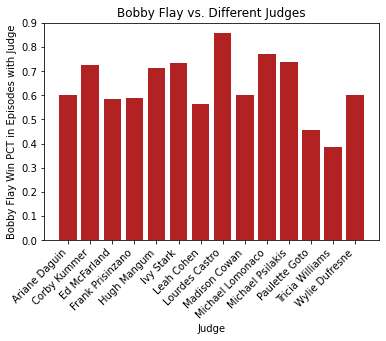

In [34]:
plt.bar(common_judges['Judge'], common_judges['Bobby Flay Win PCT'], color = 'firebrick')
plt.xlabel('Judge')
plt.ylabel('Bobby Flay Win PCT in Episodes with Judge')
plt.title('Bobby Flay vs. Different Judges')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Bobby Flay seems to struggle when Tricia Williams or Paulette Goto are his judges. He has won only 5 of 13 episodes (38%) with Tricia Williams, and only 5 of 11 episodes (45%) with Paulette Goto.

Meanwhile, Flay does very well when Lourdes Castro is a judge, winning 12 of 14 competitions (86%).

### Judges' First Episode

With this data on judges, we want to examine another factor: whether it was the judge's first episode. By adding two new columns, we will have every judge's first episode and whether or not Bobby Flay won. Perhaps, judges tend to be meaner or nicer to Bobby on their first appearance in the show.

In [35]:
judges_dist['First Episode'] = np.zeros((336,1))
judges_dist['First Episode BF win'] = np.zeros((336,1))
for row1 in range(len(judges_dist)):
    judge_appearances = []
    for row2 in range(len(data)):
        if data.loc[row2, 'judge1'] == judges_dist.loc[row1, 'Judge'] or data.loc[row2, 'judge2'] == judges_dist.loc[row1, 'Judge'] or data.loc[row2, 'judge3'] == judges_dist.loc[row1, 'Judge']:
            judge_appearances.append(data.loc[row2, 'num_overall'])
    judges_dist.loc[row1, 'First Episode'] = min(judge_appearances)

In [36]:
for row1 in range(len(judges_dist)):
    judges_dist.loc[row1, 'First Episode BF win'] = data[data['num_overall'] == judges_dist.loc[row1, 'First Episode']].Win.item()

In [37]:
judges_dist.head()

,Judge,Number of Appearances,Bobby Flay victories,Bobby Flay Win PCT,First Episode,First Episode BF win
0,Abigail Hitchcock,3,2.0,0.666667,165.0,True
1,Adam Greenberg,1,1.0,1.000000,258.0,True
2,Adam Sappington,1,1.0,1.000000,270.0,True
3,Adrienne Cheatham,4,2.0,0.500000,253.0,True
4,Akhtar Nawab,4,2.0,0.500000,179.0,True


In [38]:
judges_dist['First Episode BF win'].sum() / len(judges_dist)

0.6547619047619048

Bobby Flay wins 65.5% of episodes where at least one of the judges is new. This is not significantly different than his overall 63% win rate. We conclude that whether or not a judge was a first time judge does not have an effect on Bobby Flay's win percentage.

## Contestants

Now, we look at another important factor: the contestant. While majority of them are new people, there are repeaters. We will analyze those that have been on the show multiple times, and how they performed.

In [39]:
contestants = data[['contestant1', 'contestant2']]
unique_cont1 = data['contestant1'].unique()
unique_cont2 = data['contestant2'].unique()
total_cont = np.concatenate((unique_cont1, unique_cont2))
unique_cont = np.unique(total_cont)

In [40]:
len(unique_cont)

586

There are 586 unique contestants (out of the 612 possible spots over 306 episodes).

In [41]:
d2 = {}
for i in unique_cont:
    d2[i] = 0
    for row in range(len(contestants)):
        for column in range(2):
            if contestants.iloc[row, column] == i:
                d2[i] += 1

In [42]:
conts = pd.DataFrame(d2.items(), columns = ['Contestant', 'Number of Appearances'])
mult_cont = conts[conts['Number of Appearances'] > 1].reset_index()

In [43]:
mult_cont[0:5]

,index,Contestant,Number of Appearances
0,17,Alex Guarnaschelli,3
1,39,Angelo Sosa,2
2,43,Anne Burrell,2
3,45,Anthony Lamas,2
4,67,Blythe Beck,2


Only one contestant has been on the show 3 times. 24 others have been on the show twice. I will now add to the table the first and second time that every contestant appeared, the results of those episodes, and the cuisine that the chef picked. Alex Guarnaschelli, the only person who competed three times, lost in the first round on his third appearance.

In [44]:
mult_cont['First Episode'] = np.zeros((25,1))
mult_cont['First Episode Winner'] = np.zeros((25,1))
mult_cont['First Episode Cuisine'] = np.zeros((25,1))
mult_cont['Second Episode'] = np.zeros((25,1))
mult_cont['Second Episode Winner'] = np.zeros((25,1))
mult_cont['Second Episode Cuisine'] = np.zeros((25,1))
for row1 in range(len(mult_cont)):
    contestant_appearances = []
    for row2 in range(len(data)):
        if data.loc[row2, 'contestant1'] == mult_cont.loc[row1, 'Contestant'] or data.loc[row2, 'contestant2'] == mult_cont.loc[row1, 'Contestant']:
            contestant_appearances.append(data.loc[row2, 'num_overall'])
    mult_cont.loc[row1, 'First Episode'] = min(contestant_appearances)
    mult_cont.loc[row1, 'First Episode Winner'] = data[data['num_overall'] == mult_cont.loc[row1, 'First Episode']].winner.item()
    mult_cont.loc[row1, 'First Episode Cuisine'] = data[data['num_overall'] == mult_cont.loc[row1, 'First Episode']].cuisine_type.item()
    mult_cont.loc[row1, 'Second Episode'] = contestant_appearances[1]
    mult_cont.loc[row1, 'Second Episode Winner'] = data[data['num_overall'] == mult_cont.loc[row1, 'Second Episode']].winner.item()
    mult_cont.loc[row1, 'Second Episode Cuisine'] = data[data['num_overall'] == mult_cont.loc[row1, 'Second Episode']].cuisine_type.item()

In [45]:
mult_cont.head()

,index,Contestant,Number of Appearances,First Episode,First Episode Winner,First Episode Cuisine,Second Episode,Second Episode Winner,Second Episode Cuisine
0,17,Alex Guarnaschelli,3,82.0,Alex Guarnaschelli,American,140.0,Alex Guarnaschelli,French
1,39,Angelo Sosa,2,48.0,Bobby Flay,Central Europe,62.0,Bobby Flay,Mexican
2,43,Anne Burrell,2,95.0,Anne Burrell,Eastern Europe,142.0,Marcus Samuelsson,Middle Eastern
3,45,Anthony Lamas,2,2.0,Bobby Flay,American,65.0,Bobby Flay,South American
4,67,Blythe Beck,2,28.0,Bobby Flay,British,62.0,Bobby Flay,Mexican


In [46]:
(mult_cont['Second Episode'] - mult_cont['First Episode']).mean()

55.12

On average, a contestant that repeats comes on 55 episodes later. Because each season is around 13 episodes, a contestant generally comes back 4 seasons after he or she first appeared.

### Redemption

In [47]:
redemption = mult_cont[mult_cont['First Episode Winner'] == 'Bobby Flay']
len(redemption)

22

Of the 25 chefs who went back on the show, 22 of them lost the first time they appeared. They rejoined the show later in hopes of redemption against Bobby Flay. 

In [48]:
redemption[redemption['Second Episode Winner'] != 'Bobby Flay']

,index,Contestant,Number of Appearances,First Episode,First Episode Winner,First Episode Cuisine,Second Episode,Second Episode Winner,Second Episode Cuisine
5,87,Bruce Kalman,2,10.0,Bobby Flay,Italian,63.0,Bruce Kalman,Italian
9,172,Einat Admony,2,144.0,Bobby Flay,Central Europe,228.0,Michael Psilakis,Central Europe
11,224,Ivana Raca,2,137.0,Bobby Flay,Italian,204.0,Ivana Raca,Italian
15,397,Michael Psilakis,2,198.0,Bobby Flay,Indian,228.0,Michael Psilakis,Central Europe
18,443,Pasquale Cozzolino,2,153.0,Bobby Flay,American,204.0,Ivana Raca,Italian
19,454,Paulette Goto,2,190.0,Bobby Flay,Indian,243.0,Zac Young,French
21,545,Thomas Boemer,2,154.0,Bobby Flay,American,197.0,Thomas Boemer,Chinese


Only 7 of the 22 were able to beat Bobby Flay on their second try. This means that given the fact that Bobby Flay won against someone the first time, he still has a 68% (15/22) win rate against the same people. 

Interestingly, 3 of those 7 winners kept the same cuisine, while 4 of the 7 changed the cuisine of their chosen dish. Perhaps even more interestingly, out of the 15 people who lost twice to Bobby Flay, only 4 kept the same cuisine. This means 11 people seeking redemption switched the entire cuisine of their chosen dish, and still got beat, truly highlighting Bobby Flay's versatility and knowledge.

### Repeaters

In [49]:
repeaters = mult_cont[mult_cont['First Episode Winner'] != 'Bobby Flay']
repeaters

,index,Contestant,Number of Appearances,First Episode,First Episode Winner,First Episode Cuisine,Second Episode,Second Episode Winner,Second Episode Cuisine
0,17,Alex Guarnaschelli,3,82.0,Alex Guarnaschelli,American,140.0,Alex Guarnaschelli,French
2,43,Anne Burrell,2,95.0,Anne Burrell,Eastern Europe,142.0,Marcus Samuelsson,Middle Eastern
24,581,Zac Young,2,118.0,Francois Payard,French,243.0,Zac Young,French


All three of these contestants tell a different story.

Alex Guarnaschelli is the only contestant to ever Beat Bobby Flay twice. He did so first with an American dish, then with a French dish. As stated earlier, he attempted a three-peat but lost in the first round. Meanwhile, Anne Burrell won in her first appearance, but lost in the first round of her second run. Zac Young is actually not a repeater; he lost in the first round of his first try. However, he came back on the show (125 episodes later!) and Beat Bobby Flay.

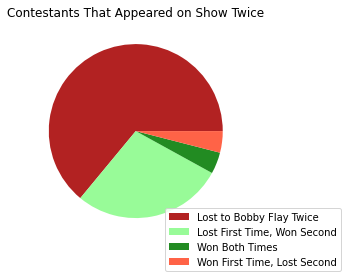

In [51]:
x = [16, 7, 1, 1]
plt.pie(x, colors = ['firebrick', 'palegreen', 'forestgreen', 'tomato'], startangle = 0)
plt.title('Contestants That Appeared on Show Twice')
labels = ['Lost to Bobby Flay Twice', 'Lost First Time, Won Second', 'Won Both Times', 
           'Won First Time, Lost Second']
plt.legend(labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

## Conclusion

Through all the possible significant trends we have explored in the show *Beat Bobby Flay*, the overall message is clear: Bobby Flay is one talented, talented chef, and there is nothing one could do to ensure victory against him.

We've found that a contestant is more likely to win in a Season Opener, but much less likely to win in a Season Finale. As for dishes, a Chinese dish has the highest chance to stump Bobby Flay, but he can win in any cuisine around the world. A contestant wins more often when Tricia Williams or Paulette Goto are judges, but good luck if Lourdes Castro is a judge; he loves Flay. It does not matter whether a judge is a first-time judge or not; the results will probably be the same. And lastly, repeating on the show (whether the first time was a success or not) does not bode well. 

Overall, there were some interesting trends with our data, but no significant conclusions that could lead us to guiding a contestant to beat Bobby Flay. 